In [4]:
import os, sys
import warnings
warnings.filterwarnings('ignore')
from cellProcessing_single_WS import *
import dask.array as da
import numpy as np
import matplotlib.pyplot as plt

dir_root = '/nrs/ahrens/jing/giving_up/20190426/fish03/7dpf_HuC-H2B_GCaMP7ff_GU-slow-fwd_fish03_exp02_20190426_221213/im'
save_root = '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20190426/fish03/7dpf_HuC-H2B_GCaMP7ff_GU-slow-fwd_fish03_exp02_20190426_221213/'

In [5]:
dask_tmp = '/opt/data/weiz/dask-worker-space'
memory_limit = 0 # unlimited

if not os.path.exists(save_root):
    os.makedirs(save_root)

nsplit = (16, 32)
baseline_percentile = 20
baseline_window = 1000   # number of frames
cameraNoiseMat = '/nrs/ahrens/ahrenslab/Ziqiang/gainMat/gainMat20180208'

In [6]:
Y_d = da.from_zarr(f'{save_root}/Y_ave.zarr')
Y_d_max = Y_d.max(axis=0, keepdims=True).compute()

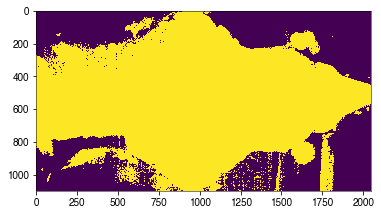

In [15]:
max_ = np.percentile(Y_d_max, 35)
mask_ = Y_d_max>max_
mask_ = da.from_array(mask_, chunks=Y_d.chunksize)
mask_ = da.repeat(mask_, Y_d.shape[0], axis=0).rechunk(Y_d.chunksize)
plt.imshow(mask_[0].squeeze())
plt.show()

In [16]:
print('========================')
print('DF/F computation')
compute_cell_dff_raw(save_root, mask_, dask_tmp=dask_tmp, memory_limit=0)

DF/F computation
Scheduler: inproc://10.150.100.212/247235/1
Dashboard link: http://10.150.100.212/247235/1:36789/status


In [ ]:
combine_dff(save_root)